In [16]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [17]:
import sqlite3

cnx = sqlite3.connect("../db.sqlite3")

query = """
    SELECT 
        restaurant_order.datetime,
        restaurant_product.name AS product_name,
        restaurant_product.price,
        restaurant_orderitem.quantity
    FROM 
        restaurant_orderitem
    JOIN 
        restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
    JOIN 
        restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
    """

df = pd.read_sql_query(query, cnx)
cnx.close()
print(f'Total rows in the DataFrame: {df.shape[0]}')


Total rows in the DataFrame: 74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

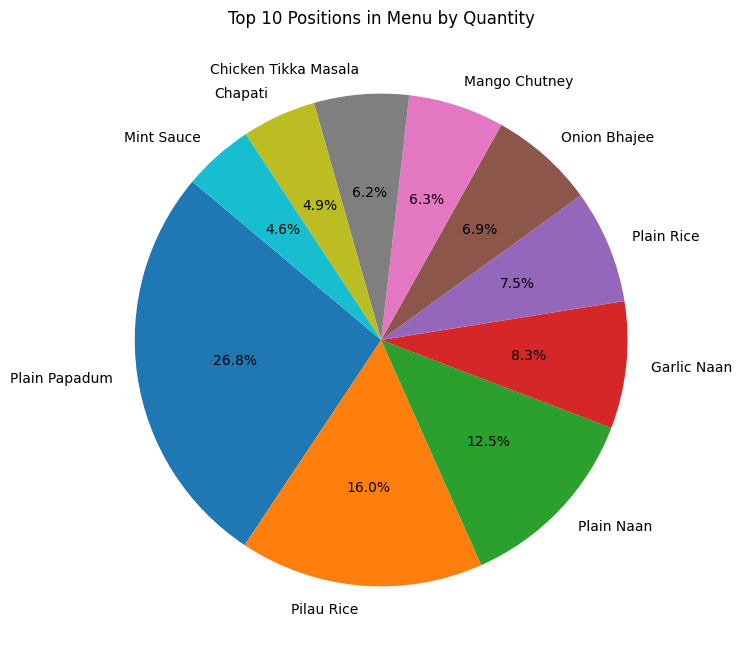

In [18]:
import matplotlib.pyplot as plt


product_quantities = df.groupby("product_name").sum()["quantity"]
top_10_products = product_quantities.nlargest(10)

plt.figure(figsize=(10, 8))
top_10_products.plot.pie(autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Positions in Menu by Quantity")
plt.ylabel("")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

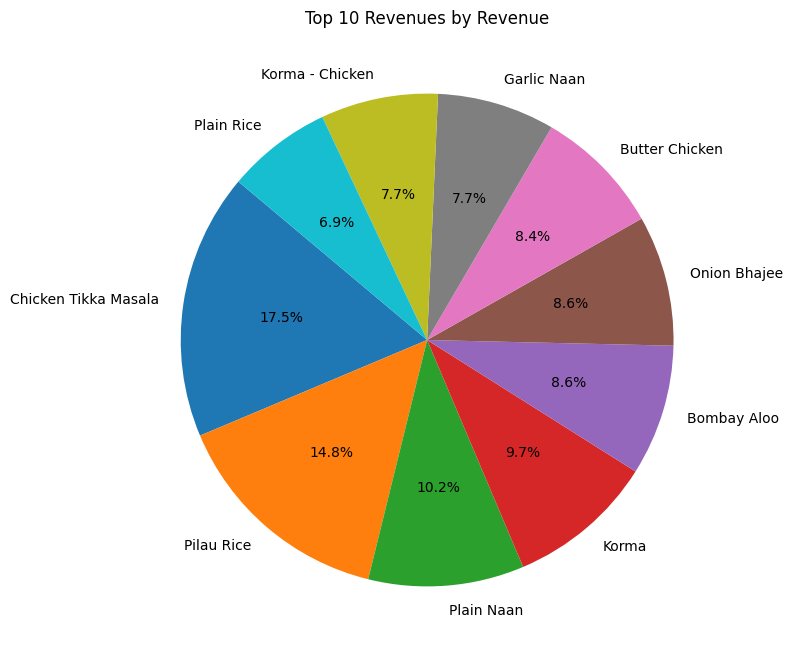

In [19]:
df["Item_Price"] = df["price"] * df["quantity"]
product_revenue = df.groupby("product_name").sum()["Item_Price"]
top_10_products_revenue = product_revenue.nlargest(10)
plt.figure(figsize=(10, 8))
top_10_products_revenue.plot.pie(autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Revenues by Revenue")
plt.ylabel("")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

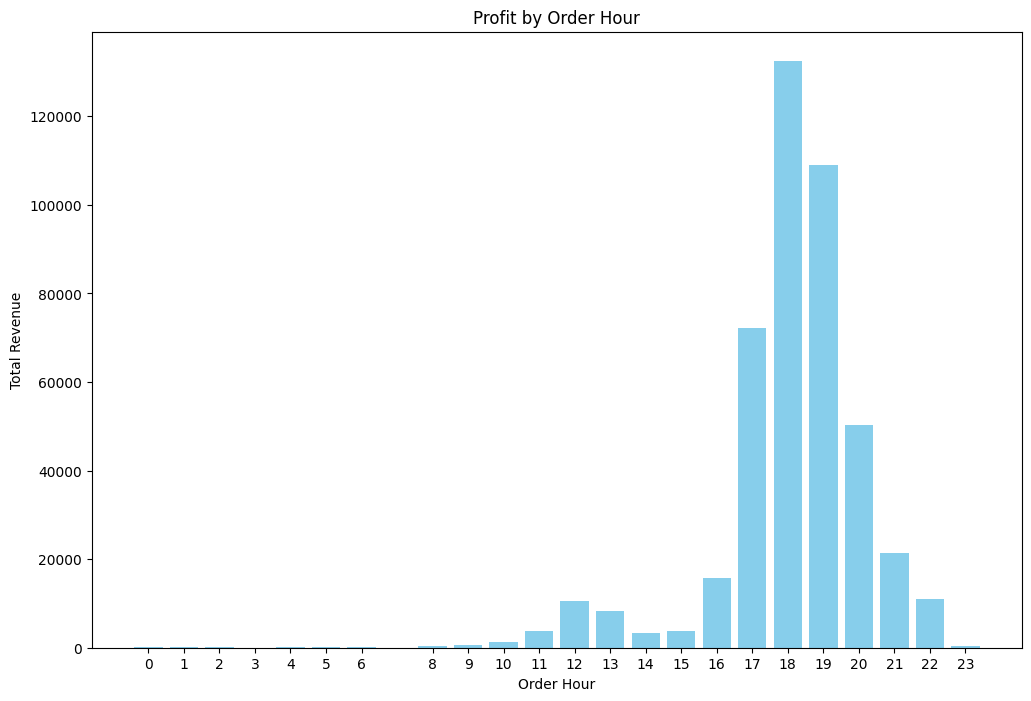

In [30]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
hourly_revenue = df.groupby("order_hour")["Item_Price"].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(hourly_revenue["order_hour"], hourly_revenue["Item_Price"], width=0.8, color="skyblue")
plt.title("Profit by Order Hour")
plt.xlabel("Order Hour")
plt.ylabel("Total Revenue")
plt.xticks(hourly_revenue["order_hour"])
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

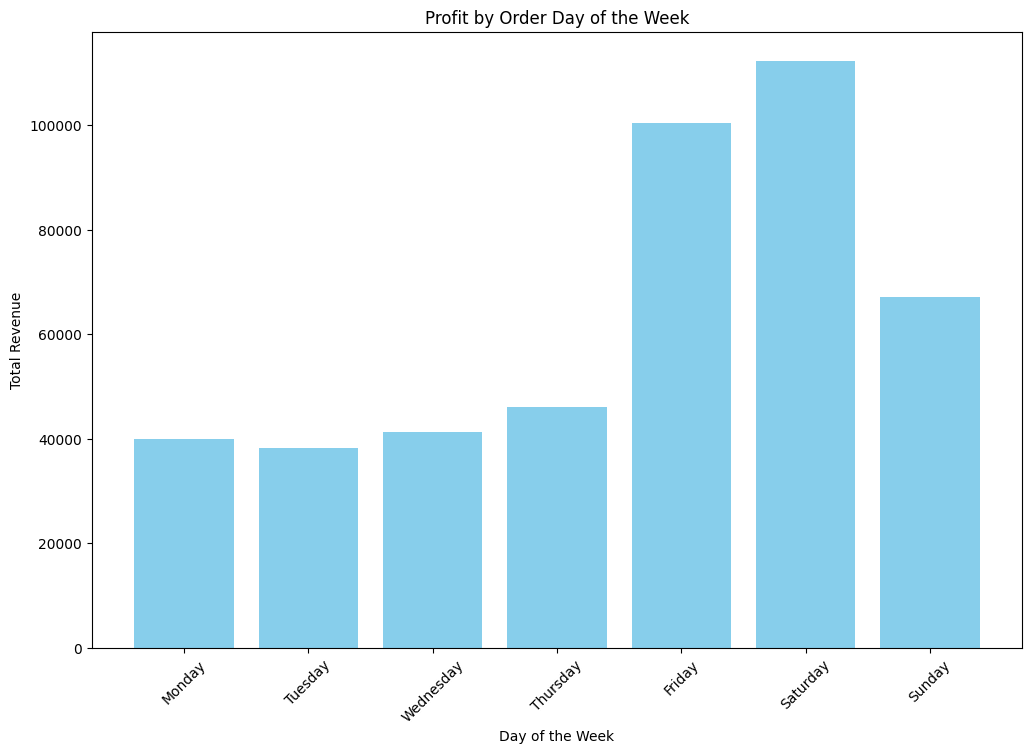

In [32]:
df["order_day"] = df["datetime"].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["order_day"] = pd.Categorical(df["order_day"], categories=day_order, ordered=True)
daily_revenue = df.groupby("order_day", observed=False)["Item_Price"].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(daily_revenue["order_day"], daily_revenue["Item_Price"], width=0.8, color="skyblue")
plt.title("Profit by Order Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()